# Evaluate

This file is for evaluating portfolio performance that's already been simulated and stored. Currently, this simulation can be completed using run_simulation.py (recommended) or portfolios.ipynb

In [ ]:
import numpy as np
from tools import retrieve_portfolio_results

policies    = ["base"]
sim_length  = "3m"
num_stocks  = 15
initial_val = 10000

for policy in policies:
    name    = f"{policy}_{sim_length}_{num_stocks}s_portfolio"
    df_bs   = retrieve_portfolio_results(name, simulation="bootstrap")
    ovr     = df_bs['overall_ret']
    ann     = df_bs['ann_ret']
    print(f"{policy.upper()} – Bootstrap:")
    print(f"  Mean End:     $ {(1 + ovr.mean())*initial_val:,.2f}")
    print(f"  Std  End:     $ {ovr.std()*initial_val:,.2f}")
    print(f"  Mean Annual:  {ann.mean()*100:.2f}%")
    print(f"  Std  Annual:  {ann.std()*100:.2f}%")
    print()

BASE – Bootstrap:
  Mean End:     $ 51,069.03
  Std  End:     $ 12,119.18
  Mean Annual:  17.44%
  Std  Annual:  2.66%



In [68]:
import pandas as pd
from tools import retrieve_portfolio_results

policies    = ["base"]
sim_length  = "3m"
num_stocks  = 15
initial_val = 10000
years       = int(sim_length[:-1])

for policy in policies:
    name    = f"{policy}_{sim_length}_{num_stocks}s_portfolio"
    # retrieve list of result dicts and convert to DataFrame
    mc_list = retrieve_portfolio_results(name, simulation="monte_carlo")
    df_mc   = pd.DataFrame(mc_list.tolist())
    end_vals = df_mc['end_value']
    ann_mc   = df_mc['ann_ret']

    print(f"{policy.upper()} – Monte Carlo:")
    print(f"  Mean End:     $ {end_vals.mean():,.2f}")
    print(f"  Std  End:     $ {end_vals.std():,.2f}")
    print(f"  Mean Annual:  {ann_mc.mean()*100:.2f}%")
    print(f"  Std  Annual:  {ann_mc.std()*100:.2f}%")
    print()

BASE – Monte Carlo:
  Mean End:     $ 10,375.51
  Std  End:     $ 867.89
  Mean Annual:  20.70%
  Std  Annual:  40.29%



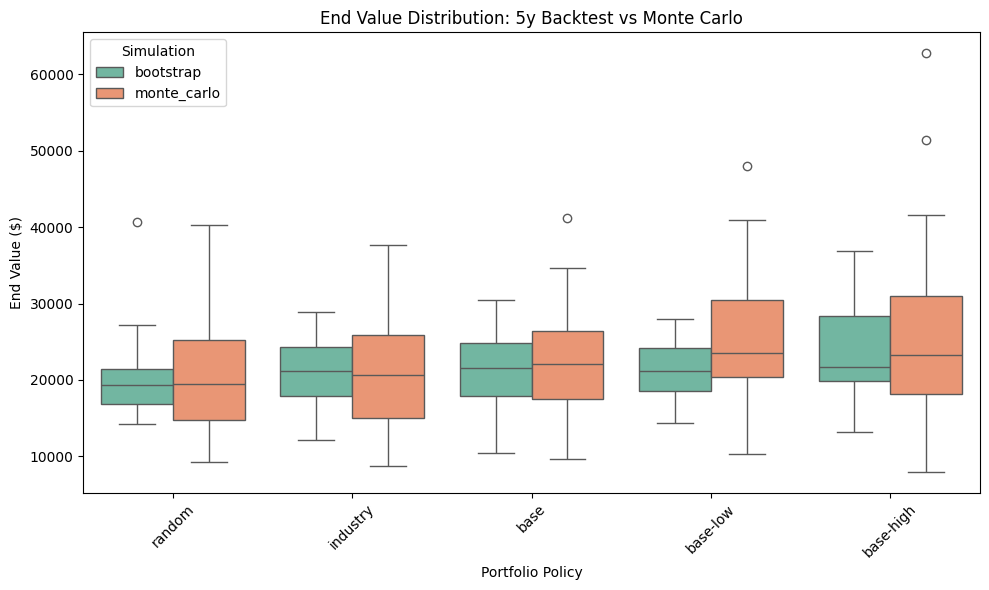

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tools import retrieve_portfolio_results

# Define portfolios and parameters
policies      = ["random","industry","base","base-low","base-high"]
sim_length    = "5y"
num_stocks    = 15
initial_value = 10000

# Collect end‑value series
records = []
for policy in policies:
    name     = f"{policy}_{sim_length}_{num_stocks}s_portfolio"
    # bootstrap end values
    df_bs    = retrieve_portfolio_results(name, simulation="bootstrap")
    for v in df_bs['end_value']:
        records.append({'portfolio': policy, 'simulation': 'bootstrap',    'value_return': v})
    # monte carlo end values
    mc_list  = retrieve_portfolio_results(name, simulation="monte_carlo")
    df_mc    = pd.DataFrame(mc_list.tolist())
    for v in df_mc['end_value']:
        records.append({'portfolio': policy, 'simulation': 'monte_carlo', 'value_return': v})

# build DataFrame and plot
df_plot = pd.DataFrame(records)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, x='portfolio', y='value_return', hue='simulation', palette='Set2')
plt.title('End Value Distribution: 5y Backtest vs Monte Carlo')
plt.ylabel('End Value ($)')
plt.xlabel('Portfolio Policy')
plt.legend(title='Simulation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()